4422102/4422102 [==============================] - 0s 0us/step


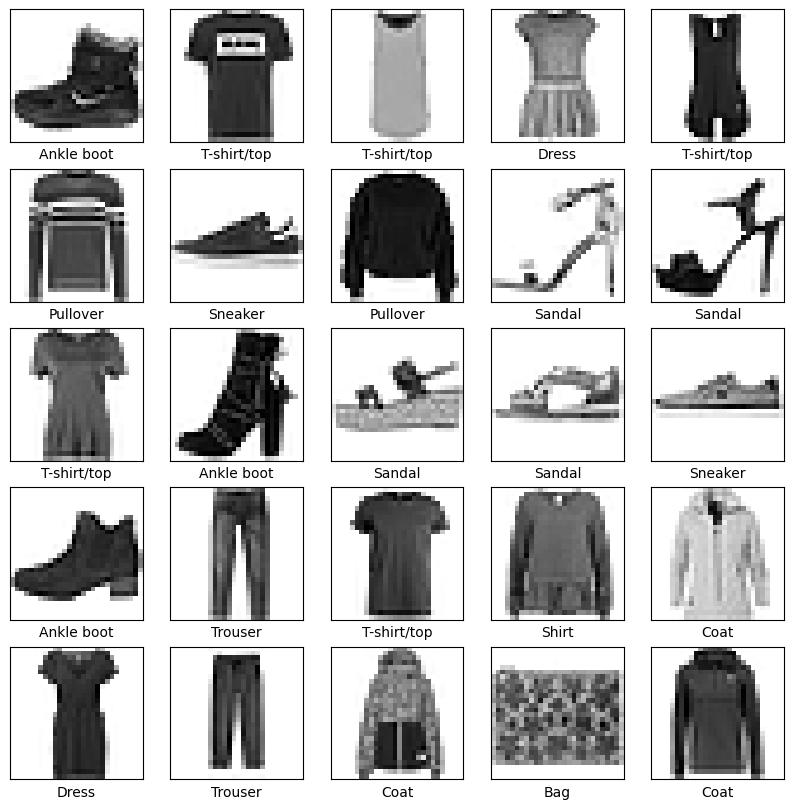

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names for the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the first 25 images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # Use class names for labels
    plt.xlabel(class_names[train_labels[i]])
plt.show()


Split dataset into train/test

Epoch 1/10
56/56 [==============================] - 3s 32ms/step - loss: 2.3107 - accuracy: 0.1273 - val_loss: 2.2860 - val_accuracy: 0.1596
Epoch 2/10
56/56 [==============================] - 1s 20ms/step - loss: 2.2788 - accuracy: 0.2352 - val_loss: 2.2724 - val_accuracy: 0.3269
Epoch 3/10
56/56 [==============================] - 2s 30ms/step - loss: 2.2663 - accuracy: 0.3688 - val_loss: 2.2603 - val_accuracy: 0.4201
Epoch 4/10
56/56 [==============================] - 2s 41ms/step - loss: 2.2541 - accuracy: 0.4361 - val_loss: 2.2480 - val_accuracy: 0.4397
Epoch 5/10
56/56 [==============================] - 2s 41ms/step - loss: 2.2416 - accuracy: 0.4706 - val_loss: 2.2355 - val_accuracy: 0.4739
Epoch 6/10
56/56 [==============================] - 2s 40ms/step - loss: 2.2290 - accuracy: 0.4843 - val_loss: 2.2227 - val_accuracy: 0.5151
Epoch 7/10
56/56 [==============================] - 1s 18ms/step - loss: 2.2160 - accuracy: 0.5163 - val_loss: 2.2095 - val_accuracy: 0.5227
Epoch 8/10
56

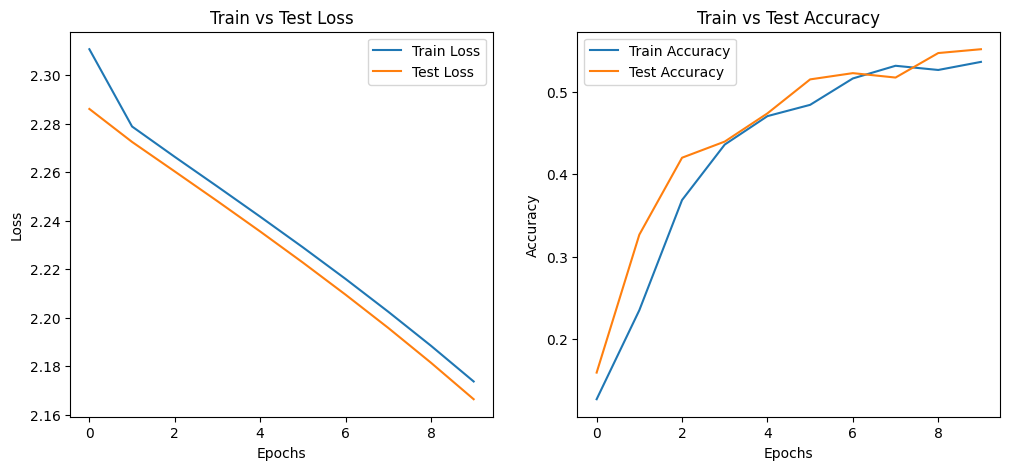

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Load the Fashion MNIST dataset
(images, labels), (test_images, test_labels) = fashion_mnist.load_data()

# Flatten and normalise the images
images = images.reshape((-1, 28*28)) / 255.0
test_images = test_images.reshape((-1, 28*28)) / 255.0

# Combine the datasets to split them manually
combined_images = np.concatenate((images, test_images), axis=0)
combined_labels = np.concatenate((labels, test_labels), axis=0)

# Split the combined dataset into a new training and testing set
train_images, test_images, train_labels, test_labels = train_test_split(
    combined_images, combined_labels, test_size=0.2, random_state=42, stratify=combined_labels
)

# Define the model
model = Sequential([
    Flatten(input_shape=(28*28,)),  # Flatten the input
    Dense(128, activation='sigmoid'),  # First hidden layer
    Dense(128, activation='sigmoid'),  # Second hidden layer
    Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=1000, validation_data=(test_images, test_labels))

# Obtain the train loss and train accuracy versus test loss and test accuracy
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
test_loss = history.history['val_loss']
test_accuracy = history.history['val_accuracy']

# Predict the classes of the test images
test_predictions = model.predict(test_images)
predicted_classes = np.argmax(test_predictions, axis=1)

# Calculate and print precision, recall, and F1 score for each class
report = classification_report(test_labels, predicted_classes, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
])
print(report)

# Print the train and test loss and accuracy
print(f"Train Loss: {train_loss[-1]:.4f}")
print(f"Train Accuracy: {train_accuracy[-1]:.4f}")
print(f"Test Loss: {test_loss[-1]:.4f}")
print(f"Test Accuracy: {test_accuracy[-1]:.4f}")

# Plot the training and test loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Train vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Using the ReLU activation function instead of Sigmoid

Epoch 1/10
56/56 [==============================] - 2s 33ms/step - loss: 2.0107 - accuracy: 0.3932 - val_loss: 1.7246 - val_accuracy: 0.5917
Epoch 2/10
56/56 [==============================] - 2s 31ms/step - loss: 1.4960 - accuracy: 0.6301 - val_loss: 1.3074 - val_accuracy: 0.6474
Epoch 3/10
56/56 [==============================] - 1s 17ms/step - loss: 1.1751 - accuracy: 0.6633 - val_loss: 1.0801 - val_accuracy: 0.6672
Epoch 4/10
56/56 [==============================] - 1s 17ms/step - loss: 1.0028 - accuracy: 0.6835 - val_loss: 0.9544 - val_accuracy: 0.6875
Epoch 5/10
56/56 [==============================] - 1s 18ms/step - loss: 0.9031 - accuracy: 0.7022 - val_loss: 0.8778 - val_accuracy: 0.7059
Epoch 6/10
56/56 [==============================] - 1s 17ms/step - loss: 0.8386 - accuracy: 0.7191 - val_loss: 0.8247 - val_accuracy: 0.7239
Epoch 7/10
56/56 [==============================] - 1s 17ms/step - loss: 0.7926 - accuracy: 0.7336 - val_loss: 0.7846 - val_accuracy: 0.7376
Epoch 8/10
56

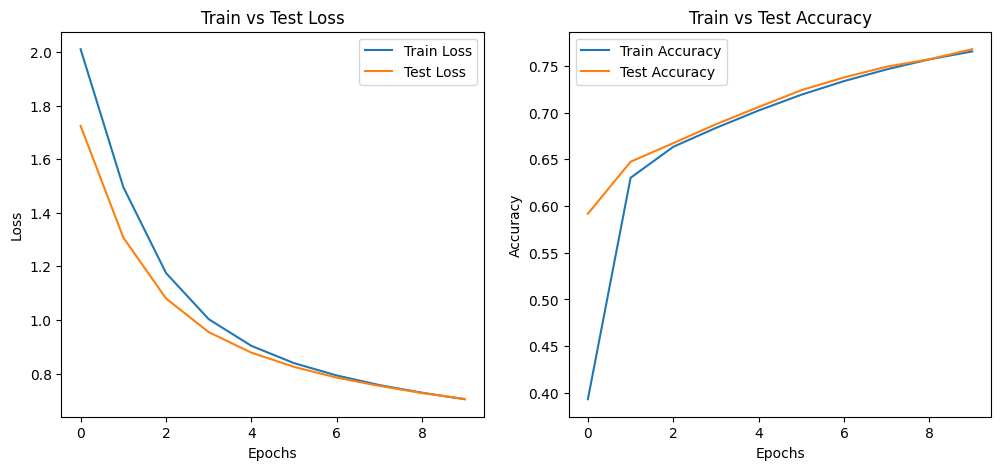

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Load the Fashion MNIST dataset
(images, labels), (test_images, test_labels) = fashion_mnist.load_data()

# Flatten and normalise the images
images = images.reshape((-1, 28*28)) / 255.0
test_images = test_images.reshape((-1, 28*28)) / 255.0

# Combine the datasets to split them manually
combined_images = np.concatenate((images, test_images), axis=0)
combined_labels = np.concatenate((labels, test_labels), axis=0)

# Split the combined dataset into a new training and testing set
train_images, test_images, train_labels, test_labels = train_test_split(
    combined_images, combined_labels, test_size=0.2, random_state=42, stratify=combined_labels
)

# Define the model with ReLU activation
model = Sequential([
    Flatten(input_shape=(28*28,)),  # Flatten the input
    Dense(128, activation='relu'),  # First hidden layer with ReLU activation
    Dense(128, activation='relu'),  # Second hidden layer with ReLU activation
    Dense(10, activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=1000, validation_data=(test_images, test_labels))

# Obtain the train loss and train accuracy versus test loss and test accuracy
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
test_loss = history.history['val_loss']
test_accuracy = history.history['val_accuracy']

# Predict the classes of the test images
test_predictions = model.predict(test_images)
predicted_classes = np.argmax(test_predictions, axis=1)

# Calculate and print precision, recall, and F1 score for each class
report = classification_report(test_labels, predicted_classes, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
])
print(report)

# Print the train and test loss and accuracy
print(f"Train Loss: {train_loss[-1]:.4f}")
print(f"Train Accuracy: {train_accuracy[-1]:.4f}")
print(f"Test Loss: {test_loss[-1]:.4f}")
print(f"Test Accuracy: {test_accuracy[-1]:.4f}")

# Plot the training and test loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Train vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

With dropout: In this modification, Dropout(0.5) specifies a dropout rate of 50%, meaning half of the neurons' outputs are randomly set to zero during each training step. This helps prevent the model from overfitting by not allowing it to rely too much on any particular set of neurons. After the model is trained, the dropout layers are not active during testing or in production, allowing all neurons to contribute to the predictions.

Epoch 1/10
56/56 [==============================] - 2s 25ms/step - loss: 2.2211 - accuracy: 0.1917 - val_loss: 1.9181 - val_accuracy: 0.5558
Epoch 2/10
56/56 [==============================] - 1s 21ms/step - loss: 1.9390 - accuracy: 0.3184 - val_loss: 1.6462 - val_accuracy: 0.6149
Epoch 3/10
56/56 [==============================] - 2s 29ms/step - loss: 1.7515 - accuracy: 0.3931 - val_loss: 1.4328 - val_accuracy: 0.6342
Epoch 4/10
56/56 [==============================] - 2s 35ms/step - loss: 1.5981 - accuracy: 0.4409 - val_loss: 1.2751 - val_accuracy: 0.6456
Epoch 5/10
56/56 [==============================] - 2s 31ms/step - loss: 1.4860 - accuracy: 0.4773 - val_loss: 1.1638 - val_accuracy: 0.6548
Epoch 6/10
56/56 [==============================] - 1s 20ms/step - loss: 1.3921 - accuracy: 0.5102 - val_loss: 1.0778 - val_accuracy: 0.6666
Epoch 7/10
56/56 [==============================] - 1s 20ms/step - loss: 1.3191 - accuracy: 0.5322 - val_loss: 1.0121 - val_accuracy: 0.6744
Epoch 8/10
56

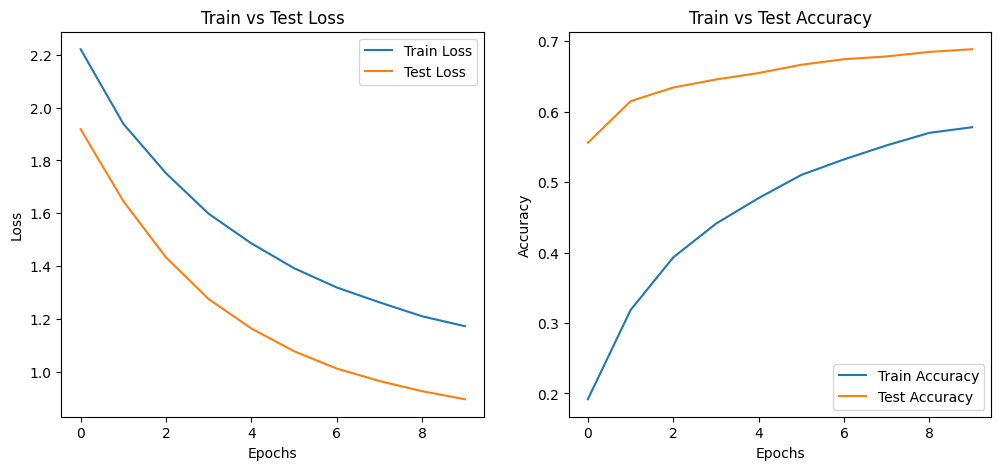

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout

# Load the Fashion MNIST dataset
(images, labels), (test_images, test_labels) = fashion_mnist.load_data()

# Flatten and normalise the images
images = images.reshape((-1, 28*28)) / 255.0
test_images = test_images.reshape((-1, 28*28)) / 255.0

# Combine the datasets to split them manually
combined_images = np.concatenate((images, test_images), axis=0)
combined_labels = np.concatenate((labels, test_labels), axis=0)

# Split the combined dataset into a new training and testing set
train_images, test_images, train_labels, test_labels = train_test_split(
    combined_images, combined_labels, test_size=0.2, random_state=42, stratify=combined_labels
)

# Define the model with Dropout regularisation
model = Sequential([
    Flatten(input_shape=(28*28,)),  # Flatten the input
    Dense(128, activation='relu'),  # First hidden layer with ReLU activation
    Dropout(0.5),                   # Dropout layer added after the first hidden layer
    Dense(128, activation='relu'),  # Second hidden layer with ReLU activation
    Dropout(0.5),                   # Dropout layer added after the second hidden layer
    Dense(10, activation='softmax') # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=1000, validation_data=(test_images, test_labels))

# Obtain the train loss and train accuracy versus test loss and test accuracy
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
test_loss = history.history['val_loss']
test_accuracy = history.history['val_accuracy']

# Predict the classes of the test images
test_predictions = model.predict(test_images)
predicted_classes = np.argmax(test_predictions, axis=1)

# Calculate and print precision, recall, and F1 score for each class
report = classification_report(test_labels, predicted_classes, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
])
print(report)

# Print the train and test loss and accuracy
print(f"Train Loss: {train_loss[-1]:.4f}")
print(f"Train Accuracy: {train_accuracy[-1]:.4f}")
print(f"Test Loss: {test_loss[-1]:.4f}")
print(f"Test Accuracy: {test_accuracy[-1]:.4f}")

# Plot the training and test loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Train vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()